In [1]:
%matplotlib inline
import sys
sys.path.append('../../')
import numpy as np
from tools import open_file, dataframe, ohlc_chart, load_products, TDOP

In [2]:
pinfo = load_products()
ohlc_raw = open_file('h5py', 'raw data/daily_futures.h5', mode='r')
tdop_raw = open_file('h5py', 'tdops/tdops_decay_7.h5', mode='r')

In [22]:
savefile = open_file('h5py', 'tdops/resist_over_thresholds.h5', mode='w', force=True)

In [23]:
for TH in np.arange(0.80, 1, 0.01):
    length = len(tdop_raw)-1
    for cnt, (symbol, file) in enumerate(tdop_raw.items()):
        print(f"\r now processing.. {symbol} {TH}% ({cnt}/{length})                ", flush=True, end='')
        ohlcs = list(filter(lambda x: x.attrs['symbol']==symbol, ohlc_raw.values()))[0].value[:,[0,1,2,3,4]]
        lower, upper = TDOP.get_resist(file, TH)
        lower = np.expand_dims(lower, axis=-1)
        upper = np.expand_dims(upper, axis=-1)
        data = np.hstack((lower, upper))
    
        
        if symbol in savefile:
            group = savefile[symbol]
        else:
            group = savefile.create_group(symbol)
        dset = group.create_dataset( str(int(TH*100)), shape=data.shape, data=data)
        dset.attrs['name'] = pinfo[symbol]['name']
        dset.attrs['symbol'] = symbol

 now processing.. ZW 0.9900000000000002% (48/48)                  

In [24]:
savefile.close()

In [7]:
test = open_file('h5py', 'tdops/resist_over_thresholds.h5', mode='r')

In [11]:
test.close()

In [8]:
import matplotlib.pyplot as plt

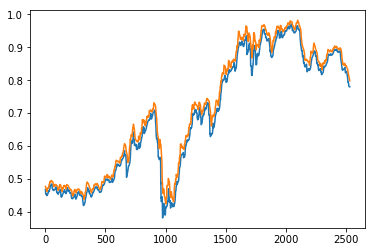

In [9]:
plt.plot(test['AD']['80'].value)